In [3]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()

bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting tracks inside the bbox

# use just one track
single_track_id = track_df['track.id'].unique()[1]
single_track = track_df[track_df['track.id'] == single_track_id]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Hello from preprocessing!


186
177
['id', 'time', 'geometry', 'GPS HDOP.value', 'GPS HDOP.unit', 'Throttle Position.value', 'Throttle Position.unit', 'Intake Temperature.value', 'Intake Temperature.unit', 'Rpm.value', 'Rpm.unit', 'GPS PDOP.value', 'GPS PDOP.unit', 'Consumption.value', 'Consumption.unit', 'GPS Altitude.value', 'GPS Altitude.unit', 'Intake Pressure.value', 'Intake Pressure.unit', 'Calculated MAF.value', 'Calculated MAF.unit', 'CO2.value', 'CO2.unit', 'GPS Speed.value', 'GPS Speed.unit', 'GPS Accuracy.value', 'GPS Accuracy.unit', 'Speed.value', 'Speed.unit', 'GPS VDOP.value', 'GPS VDOP.unit', 'GPS Bearing.value', 'GPS Bearing.unit', 'Engine Load.value', 'Engine Load.unit', 'track.id', 'track.length', 'track.begin', 'track.end', 'sensor.type', 'sensor.engineDisplacement', 'sensor.model', 'sensor.id', 'sensor.fuelType', 'sensor.constructionYear', 'sensor.manufacturer', 'track.appVersion', 'track.touVersion', 'MAF.value', 'MAF.unit', 'O2 Lambda Voltage ER.value', 'O2 Lambda Voltage ER.unit', 'O2 Lambd

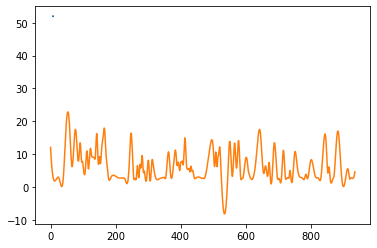

In [37]:
import matplotlib.pyplot as plt
import plotly.express as px

no_outliers = preprocessing.remove_outliers(single_track, 'CO2.value')

interpolated_points = preprocessing.interpolate(no_outliers)

# Simple visualization of the trajectory
fig, ax = plt.subplots()
ax.plot(interpolated_points['lng'], interpolated_points['lat'], 'r-')
plt.show()

# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(interpolated_points, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, cleaned and interpolated")
fig.update_layout(mapbox_style="open-street-map")
fig.show()